# biological image segmentation
## separate cells from the background to quantify the biolgoical images

In [215]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import skimage.color
import skimage.io
import skimage.viewer
import PIL
import scipy.misc
import scipy.ndimage
import cv2

In [5]:
from skimage.filters import threshold_multiotsu
from PIL import Image
from matplotlib.pyplot import imread

In [7]:
img_path = "/Users/liuc19/Dropbox/shared_doc/I815_2L_o.tif"

In [8]:
# GC_img = Image.open(img_path)

In [9]:
# GC_img

In [10]:
GC_img = skimage.io.imread(fname=img_path)

In [197]:
# GC_img_truth = matplotlib.pyplot.imread('/Users/liuc19/Dropbox/shared_doc/I815_2L_1.tif')

In [199]:
# GC_truth_gray = skimage.color.rgb2gray(GC_img_truth)

In [54]:
# viewer = skimage.viewer.ImageViewer(GC_img)

In [55]:
# viewer.show()

[]

In [11]:
GC_gray = skimage.color.rgb2gray(GC_img)

In [57]:
# viewer2 = skimage.viewer.ImageViewer(GC_gray)

In [58]:
# viewer2.show()

[]

Text(0.5, 1.0, 'grayscale')

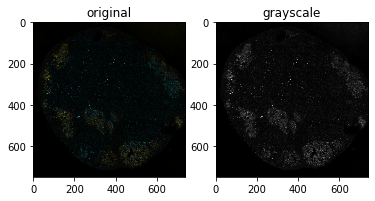

In [12]:
plt.subplot(1,2,1)
plt.imshow(GC_img)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(GC_gray, cmap='gray')
plt.title('grayscale')

In [13]:
median_filtered = scipy.ndimage.median_filter(GC_gray, size = 3)

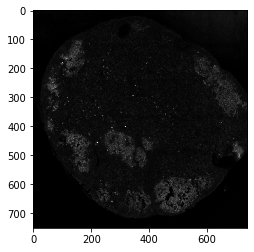

In [14]:
plt.imshow(median_filtered, cmap = 'gray')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


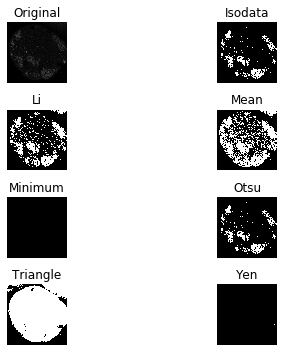

In [15]:
result = skimage.filters.thresholding.try_all_threshold(median_filtered)

In [16]:
# Otsu thresholding and visualization
threshold = skimage.filters.threshold_otsu(median_filtered)

In [17]:
from scipy import ndimage

In [145]:
bw_otsu_filtered = np.uint8(median_filtered > threshold) * 255

Text(0.5, 1.0, 'otsu method filtered')

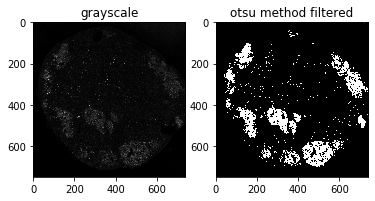

In [146]:
plt.subplot(1,2,1)
plt.imshow(GC_gray, cmap='gray')
plt.title('grayscale')
plt.subplot(1,2,2)
plt.imshow(bw_otsu_filtered, cmap='gray')
plt.title('otsu method filtered')

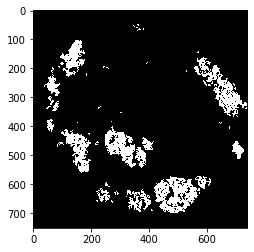

In [168]:
# remove noisy small objects
from skimage.morphology import remove_small_objects
img = np.array(bw_otsu_filtered)
arr = img > 0
bw_otsu_cleared = remove_small_objects(arr, min_size=30)
plt.imshow(bw_otsu_cleared, cmap='gray')

In [171]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
sc = preprocessing.MinMaxScaler()
GC_sc = sc.fit_transform(bw_otsu_cleared)

In [172]:
# transfer the image matrix to position 2D matrix
GC_sc_df = pd.DataFrame(GC_sc)
[a, b] = GC_sc_df.shape
row = []
col = []
pos = 0
for i in range(a):
    for j in range(b):
        if GC_sc_df.iloc[i,j]>0:
            pos = pos + 1
            row.append(i)
            col.append(j)

In [173]:
GC_pos_df = pd.DataFrame(
    {'x': row,
     'y': col
    })
GC_pos_df.sample(6)

,x,y
44181,632,561
39400,602,253
15144,311,663
24265,454,409
34392,518,366
24071,453,703


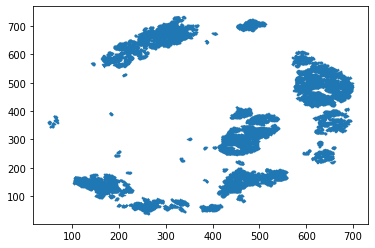

In [174]:
plt.scatter(GC_pos_df['x'], GC_pos_df['y'], s=0.2)

In [175]:
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(GC_pos_df)
    Sum_of_squared_distances.append(km.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

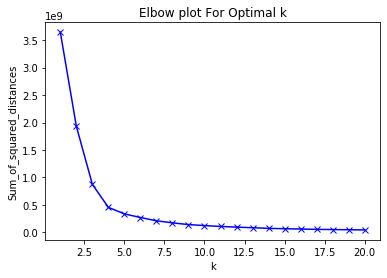

In [176]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow plot For Optimal k')
plt.show

In [177]:
# run kmeans with 8 centroids
km = KMeans(n_clusters=8)
km.fit(GC_pos_df)
y_km = km.predict(GC_pos_df)

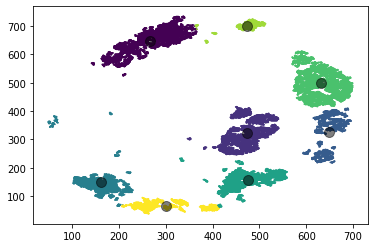

In [178]:
plt.scatter(GC_pos_df['x'], GC_pos_df['y'], s=0.2, c=y_km, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

In [553]:
# segmented_img = km.cluster_centers_[km.labels_]

In [199]:
avg_GC_size = np.count_nonzero(GC_sc_df)/8
print(avg_GC_size)

6595.625


# Another GC image for comparison

In [91]:
img_path2 = "/Users/liuc19/Dropbox/shared_doc/I815_L_o.tif"

In [92]:
GC_img2 = skimage.io.imread(fname=img_path2)

In [93]:
GC_gray2 = skimage.color.rgb2gray(GC_img2)

Text(0.5, 1.0, 'grayscale')

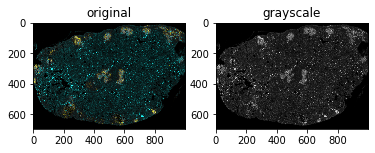

In [94]:
plt.subplot(1,2,1)
plt.imshow(GC_img2)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(GC_gray2, cmap='gray')
plt.title('grayscale')

In [95]:
median_filtered2 = scipy.ndimage.median_filter(GC_gray2, size = 3)

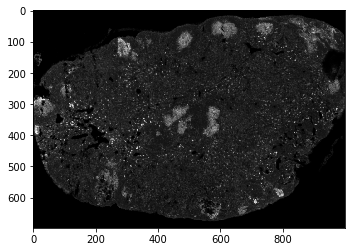

In [96]:
plt.imshow(median_filtered2, cmap = 'gray')

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


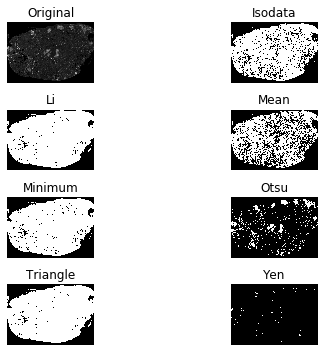

In [97]:
result2 = skimage.filters.thresholding.try_all_threshold(median_filtered2)

In [98]:
# Otsu thresholding and visualization
threshold2 = skimage.filters.threshold_otsu(median_filtered2)

In [99]:
bw_otsu_filtered2 = np.uint8(median_filtered2 > threshold2) * 255

Text(0.5, 1.0, 'otsu method filtered')

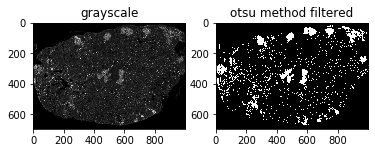

In [100]:
plt.subplot(1,2,1)
plt.imshow(GC_gray2, cmap='gray')
plt.title('grayscale')
plt.subplot(1,2,2)
plt.imshow(bw_otsu_filtered2, cmap='gray')
plt.title('otsu method filtered')

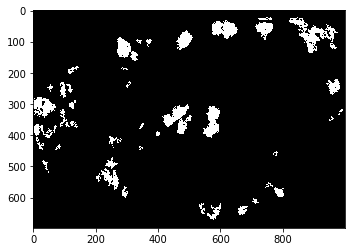

In [184]:
# remove noisy small objects
from skimage.morphology import remove_small_objects
img2 = np.array(bw_otsu_filtered2)
arr2 = img2 > 0
bw_otsu_cleared2 = remove_small_objects(arr2, min_size=100)
plt.imshow(bw_otsu_cleared2, cmap='gray')

In [187]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
sc2 = preprocessing.MinMaxScaler()
GC_sc2 = sc2.fit_transform(bw_otsu_cleared2)

In [188]:
# transfer the image matrix to position 2D matrix
GC_sc_df2 = pd.DataFrame(GC_sc2)
[a2, b2] = GC_sc_df2.shape
row2 = []
col2 = []
pos2 = 0
for i in range(a2):
    for j in range(b2):
        if GC_sc_df2.iloc[i,j]>0:
            pos2 = pos2 + 1
            row2.append(i)
            col2.append(j)

In [189]:
GC_pos_df2 = pd.DataFrame(
    {'x': row2,
     'y': col2
    })
GC_pos_df2.sample(6)

,x,y
32125,412,263
16061,181,128
18732,263,102
28835,372,568
30267,385,564
28726,372,9


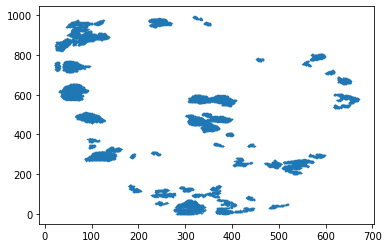

In [190]:
plt.scatter(GC_pos_df2['x'], GC_pos_df2['y'], s=0.1)

In [191]:
Sum_of_squared_distances2 = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(GC_pos_df2)
    Sum_of_squared_distances2.append(km.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

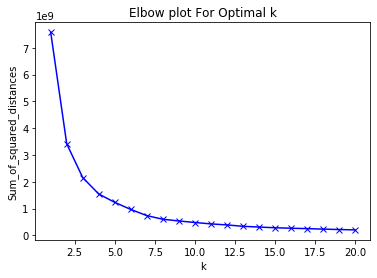

In [111]:
plt.plot(K, Sum_of_squared_distances2, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow plot For Optimal k')
plt.show

In [204]:
# run kmeans with 13 centroids
km2 = KMeans(n_clusters=13)
km2.fit(GC_pos_df2)
y_km2 = km.predict(GC_pos_df2)

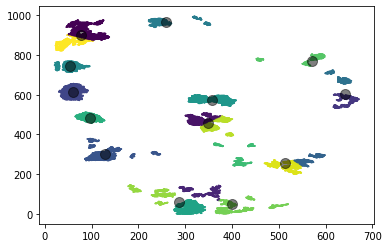

In [205]:
plt.scatter(GC_pos_df2['x'], GC_pos_df2['y'], s=0.2, c=y_km2, cmap='viridis')

centers2 = km2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=100, alpha=0.5)

In [207]:
avg_GC_size2 = np.count_nonzero(GC_sc_df2)/13
print(avg_GC_size2)

3024.6923076923076


In [238]:
avg_GC_list = [avg_GC_size, avg_GC_size2]
label = ["lymph_node1", "lymph_node2"]

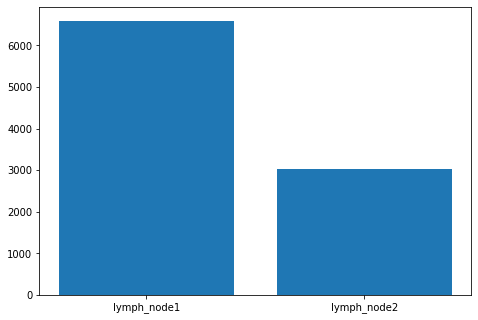

In [243]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,avg_GC_list)
plt.show()